In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Source

https://www.kaggle.com/sureshmecad/health-insurance-lead-prediction

# Importing Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_original = train.copy()
test_original = test.copy()

# Understanding Dataset

In [3]:
display(train.shape)
display(test.shape)

(50882, 14)

(21805, 13)

In [4]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [5]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0



# Describing dataset


In [6]:
 train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [7]:
test.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,21805.000000,21805.000000,21805.000000,21805.000000,13202.000000,21805.000000,21805.000000
mean,61785.000000,1748.737491,44.877734,42.748085,2.440085,15.138363,14220.306581
std,6294.705646,1438.358949,17.254898,17.269112,1.037627,6.302805,6497.996164
min,50883.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2152.000000
25%,56334.000000,535.000000,28.000000,27.000000,1.000000,12.000000,9285.000000
50%,61785.000000,1392.000000,44.000000,41.000000,3.000000,17.000000,13244.000000
75%,67236.000000,2712.000000,59.000000,57.000000,3.000000,20.000000,18201.600000
max,72687.000000,6185.000000,75.000000,75.000000,4.000000,22.000000,43776.000000


In [8]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [9]:
test.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium'],
      dtype='object')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [11]:
train.nunique()

ID                         50882
City_Code                     36
Region_Code                 5316
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
Reco_Policy_Cat               22
Reco_Policy_Premium         6977
Response                       2
dtype: int64

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [13]:
test.nunique()

ID                         21805
City_Code                     36
Region_Code                 4694
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
Reco_Policy_Cat               22
Reco_Policy_Premium         5226
dtype: int64

In [14]:
train.count()

ID                         50882
City_Code                  50882
Region_Code                50882
Accomodation_Type          50882
Reco_Insurance_Type        50882
Upper_Age                  50882
Lower_Age                  50882
Is_Spouse                  50882
Health Indicator           39191
Holding_Policy_Duration    30631
Holding_Policy_Type        30631
Reco_Policy_Cat            50882
Reco_Policy_Premium        50882
Response                   50882
dtype: int64

In [15]:
#counting null values
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [16]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [17]:
# Dropping data which are not needed
train = train.drop(['ID','City_Code','Region_Code'], axis =1)

In [18]:
test = test.drop(['ID','City_Code','Region_Code'], axis =1)

In [19]:
train.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [20]:
train.columns

Index(['Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age',
       'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response'],
      dtype='object')

In [21]:
test.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


<AxesSubplot:>

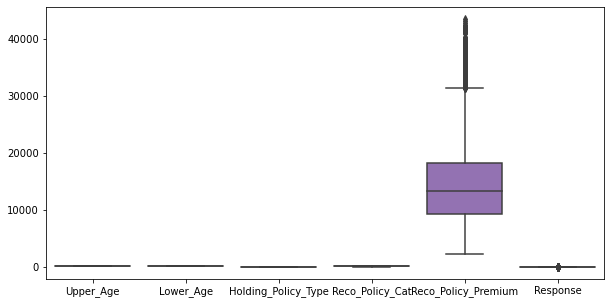

In [22]:
#finding out outliers
plt.figure(figsize=(10,5))
sns.boxplot(data = train)

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

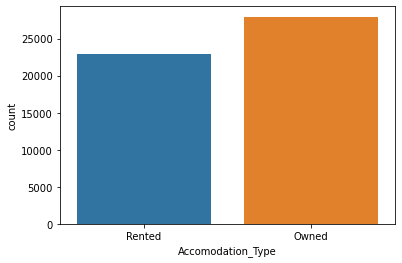

In [23]:
#Accomodation_type plot
sns.countplot(x ='Accomodation_Type',data = train)

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

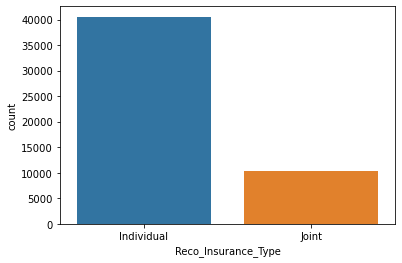

In [24]:
#'Reco_Insurance_Type plot
sns.countplot(x = 'Reco_Insurance_Type', data = train)

<AxesSubplot:xlabel='Is_Spouse', ylabel='count'>

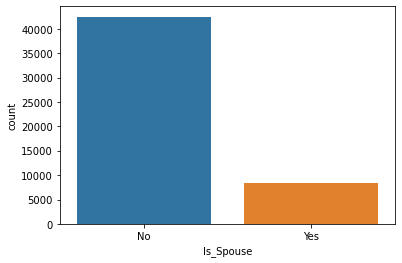

In [25]:
#'Is_spouce'plot
sns.countplot(x = 'Is_Spouse', data = train)

<AxesSubplot:xlabel='Health Indicator', ylabel='count'>

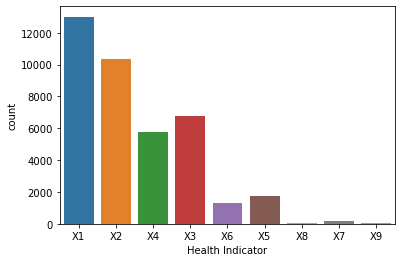

In [26]:
# health incator count plot
sns.countplot(x = 'Health Indicator', data = train)
#plt.yscale('log')

In [ ]:
#counting out holdong policies duration
sns.countplot(x ='Holding_Policy_Duration' , data = train)
plt.yscale('log')

In [ ]:
#counting out holdong policies type we have 4 type
sns.countplot(x ='Holding_Policy_Type' , data = train)

In [ ]:
#countplot for insurance type and relating it with Is_spouse
sns.countplot(x = 'Reco_Insurance_Type',hue = 'Is_Spouse',data = train)

In [ ]:
#'Is_spouce'plot
sns.countplot(x = 'Is_Spouse', data = train)

In [ ]:
#Reco_Policy_Premium boxplot for outliers
sns.boxplot(y='Reco_Policy_Premium',data = train)

In [ ]:
#Reco_Policy_Premium scatterplot for outliers
sns.scatterplot(y='Reco_Policy_Premium',x='Reco_Insurance_Type',data = train)

In [ ]:
#responce given by the customers for the new health insurance policy
sns.countplot(x= 'Response', data = train)

# Cleaning And Data Analysis

In [ ]:
#filling out null values and identifing the best value forom Mean median and mode
#we used mode here because we hav categorical variables here so we cannot change and they are in strings so we cannot use mean or median so we need to use mode
mode0 = train['Health Indicator'].mode()[0]
train['Health Indicator']= train['Health Indicator'].fillna(mode0)

#filling for test data set also

mode1 = test['Health Indicator'].mode()[0]
test["Health Indicator"] = test["Health Indicator"].fillna(mode1)


In [ ]:
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].replace('14+',14).astype(float)
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].replace('14+',14).astype(float)

In [ ]:
# Measuring cent tendency
mean_duration = train['Holding_Policy_Duration'].mean()
median_duration =  train['Holding_Policy_Duration'].median()
mode_duration = train['Holding_Policy_Duration'].mode()
print(mean_duration)
print(median_duration)
print(mode_duration)
# Refrence   https://stackoverflow.com/questions/51417483/mean-median-mode-lines-showing-only-in-last-graph-in-seaborn/51417635 
f, ax = plt.subplots()

sns.countplot(data = train,x =  'Holding_Policy_Duration', ax = ax )
ax.axvline(mean_duration, color='r', linestyle='-')
ax.axvline(median_duration, color='b', linestyle='-')

plt.legend({'Mean':mean_duration,'Median':median_duration})

plt.show()

#right skewed data so we will use median
# As we can see in the plots the median value is less than mean value and almost half of the data is on the other side of median so it is preffered to use Median for filling up in null values and it consider as a central tendency value as our data is not symmetric/ skewed.

In [ ]:
#filling values with median 
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].fillna(median_duration)

#filling for test data set also
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].fillna(test['Holding_Policy_Duration'].median())

In [ ]:
#Filling out holding_policy_type

mean_type = train['Holding_Policy_Type'].mean()
median_type = train['Holding_Policy_Type'].median()
mode_type = train['Holding_Policy_Type'].mode()


# finding central tebndency by plot
# Refrence   https://stackoverflow.com/questions/51417483/mean-median-mode-lines-showing-only-in-last-graph-in-seaborn/51417635 
f, ax_count = plt.subplots()
sns.countplot(data = train,x ='Holding_Policy_Type', ax=ax_count)
ax_count.axvline(median_type, color='b', linestyle='-')
ax_count.axvline(mean_type, color='r', linestyle='--')
plt.show()

#right skewed data so we will use median
# As we can see in the plots the median value is less than mean value and almost half of the data is on the other side of median so it is preffered to use Median for filling up in null values and it consider as a central tendency value as our data is not symmetric/ skewed.

In [ ]:
train['Holding_Policy_Type'] = train['Holding_Policy_Type'].fillna(median_type)

test['Holding_Policy_Type'] = test['Holding_Policy_Type'].fillna(test['Holding_Policy_Type'].median())


In [ ]:
train['Reco_Policy_Premium'] = train['Reco_Policy_Premium'].astype(int)
test['Reco_Policy_Premium'] = test['Reco_Policy_Premium'].astype(int)

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
#finding out Correlation betwwen each variable with policy type

print(train.corr()['Holding_Policy_Type'])

In [ ]:
#finding out Correlation betwwen each variable with Response
print(train.corr()['Response'])

In [ ]:
#finding out Correlation betwwen each variable with Reco policy category
print(train.corr()['Reco_Policy_Cat'])

# Modeling And Evaluating

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import xgboost
from xgboost import XGBClassifier
from sklearn import tree

In [ ]:
#A simple way to convert the values into binary without changng the original dataset and it will fcreate a descrete column 
#source "Datacamp" used when ever ML model are usd as they do not take values as "Yes/no" "True/false" they only take binary input. 
 
train_dummy = pd.get_dummies(train)


test_dummy = pd.get_dummies(test)


In [ ]:
train_dummy.head()

In [ ]:
test_dummy.head()

In [ ]:
X = train_dummy.drop('Response', axis = 1)
y = train_dummy['Response']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state = 42 )

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
kn_score_test = knn.score(X_test,y_test)
kn_score_train= knn.score(X_train,y_train)
print("Accuracy: " +str(accuracy_score(y_test, y_pred)))
print("Train Score:" +str( kn_score_train))

# Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y2_pred = gnb.predict(X_test)
gnb_score_test = gnb.score(X_test,y_test)
gnb_score_train = gnb.score(X_train,y_train)
print("Accuracy: " +str(accuracy_score(y_test, y2_pred,normalize = True)))
print("Train Score:" +str(gnb_score_train))


# XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y3_pred = xgb.predict(X_test)
xgb_score_test = xgb.score(X_test,y_test)
xgb_score_train = xgb.score(X_train,y_train)
print("Accuracy: " +str(accuracy_score(y_test, y3_pred)))
print("Train Score:" +str(xgb_score_train))

# Decision Tree

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y4_pred = clf.predict(X_test)
clf_score_test = clf.score(X_test,y_test)
clf_score_train = clf.score(X_train,y_train)
print("Accuracy: " +str(accuracy_score(y_test, y4_pred)))
print("Train Score:" +str(clf_score_train))

In [ ]:
y_pred_final = knn.predict(test_dummy)


# Submission

In [ ]:
submission = pd.DataFrame({'ID': test_original['ID'], 'Response': y_pred_final})
submission.to_csv('Insurance.csv', index=False)

# Code Refrence Link 
The majority of the above code are been used gtom the refrence link provided below form data collection to prediction but in this Kaggle 
https://www.kaggle.com/sureshmecad/health-insurance-lead?scriptVersionId=55470809&cellId=1